# Análisis de Dataset LEGO
La práctica final de nuestro grupo constará del análisis del dataset publicado por Rachel Tatman, compilado por Rebrickable sobre información de piezas, sets, contenido de sets y colores de piezas de todos los sets originales de LEGO (acualizado hasta Julio de 2017).

Link al dataset:
https://www.kaggle.com/datasets/rtatman/lego-database

Este parece extraido de un esquema de base de datos relacional.

## Análisis Exploratorio

Para comenzar con la práctica, primero importaremos el dataset y aplicar diferentes técnicas explorativas vistas para comprender mejor con qué información contamos, y la relación entre las diferentes características contempladas.

Luego, decidiremos cuál de las preguntas propuestas elegiremos para basar el resto de la práctica integradora.

Estas preguntas pueden ser:

 - ¿Cómo evolucionaron los sets de lego en tamaño a través de los años?
 - ¿Existe alguna asociación entre los colores y las temáticas?
 - ¿Podría predecir a que temática pertenece un set basado en el 
contenido de este? (recomendado)
 - A través de los años, ¿Cuál o cuáles son los sets que tienen las piezas 
más raras?
 - ¿Cómo evolucionaron los colores en los sets de lego a través de los 
años?


El trabajo se enfocará principalmente en la respuesta a
- ¿Podría predecir a que temática pertenece un set basado en el 
contenido de este?


### Sets de Datos

Antes de importar el dataset, podemos bservar dentro de la carpeta /data que éste se encuentra distribuido en diferentes archivos CSV.
Dentro de la carpeta también se encuentra un DER que explica cómo estos datos se asemblan. Describamos por encima el propósito de cada archivo/tabla:

| Archivo/tabla       | Descripción |
| --------------------|-------------|
| colors.csv          | Id, nombre, valores RGB del color de la pieza e indicativo de si es transparente             |             |
| inventories.csv     | Asocia conjuntos de piezas individuales (de determinado color y características, u otros subsets, a un determinado set.            |
| inventory_parts.csv | Asocia un color, cantidad de piezas, y un booleano de repuesto entre un inventario y un tipo de pieza           |
| inventory_sets.csv  | Asocia un set en particular a un inventario (subsets como parte del inventario de otro set).            |
| part_categories.csv | Etiquetas de clasificación de los tipos de pieza LEGO (un Enum)            |
| parts.csv           | Tipos de piezas LEGO, con nombre y una categoría            |
| sets.csv            | Productos LEGO vendidos en sí, son paquetes que incluyen piezas de diversos tipos y subsets. Se guardan diferentes datos como año de lanzamiento, nombre, etc.           |
| themes.csv          | Etiqueta de clasificación de los diferentes sets.            |




In [770]:
# Importamos librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={
    'axes.facecolor': 'black',
    'figure.facecolor': 'black',
    'axes.labelcolor': 'white',
    'xtick.color': 'cyan',
    'ytick.color': 'white',
    'axes.titlecolor': 'white'
})


In [771]:
# Cargamos el dataset
colors = pd.read_csv("./data/colors.csv")
inventories = pd.read_csv("./data/inventories.csv")
inventory_parts = pd.read_csv("./data/inventory_parts.csv")
inventory_sets = pd.read_csv("./data/inventory_sets.csv")
part_categories = pd.read_csv("./data/part_categories.csv")
parts = pd.read_csv("./data/parts.csv")
sets = pd.read_csv("./data/sets.csv")
themes = pd.read_csv("./data/themes.csv")

## Análisis Explorativo

### 1- Visualizar las primeras filas

In [772]:
# Visualizamos las primeras filas del dataset

print("colors:")
display(colors.head())

print("inventories:")
display(inventories.head())


print("inventory_parts:")
display(inventory_parts.head())

print("inventory_sets:")
display(inventory_sets.head())

print("part_categoies:")
display(part_categories.head())

print("parts:")
display(parts.head())

print("sets:")
display(sets.head())

print("themes:")
display(themes.head())

colors:


,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


inventories:


,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1


inventory_parts:


,inventory_id,part_num,color_id,quantity,is_spare
0,1,48379c01,72,1,f
1,1,48395,7,1,f
2,1,mcsport6,25,1,f
3,1,paddle,0,1,f
4,3,11816pr0005,78,1,f


inventory_sets:


,inventory_id,set_num,quantity
0,35,75911-1,1
1,35,75912-1,1
2,39,75048-1,1
3,39,75053-1,1
4,50,4515-1,1


part_categoies:


,id,name
0,1,Baseplates
1,2,Bricks Printed
2,3,Bricks Sloped
3,4,"Duplo, Quatro and Primo"
4,5,Bricks Special


parts:


,part_num,name,part_cat_id
0,0687b1,Set 0687 Activity Booklet 1,17
1,0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1
2,0902,Baseplate 16 x 24 with Set 080 Small White Hou...,1
3,0903,Baseplate 16 x 24 with Set 080 Red House Print,1
4,0904,Baseplate 16 x 24 with Set 080 Large White Hou...,1


sets:


,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


themes:


,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


Viendo las primeras filas de cada dataframe, observamos que estos datos son de carácter relacional (obtenidos de una base de datos estructurada, por sus llaves primarias y foráneas).

Es por eso que habrá que realizar merging/joining respecto a las preguntas que deseamos responder.

También podemos ver que hay datos que probablemente necesiten ser re-estructurados para servir en propósito comparativo, como lo es el tamaño de las piezas (sus dimensiones no están almacenadas como números).

### 2- Resumen de 5 números

In [773]:
# Con Pandas, el R5N es tan facil como utilizar el método .describe() en cada dataframe.

print("colors:")
display(colors.describe())

print("inventories:")
display(inventories.describe())


print("inventory_parts:")
display(inventory_parts.describe())

print("inventory_sets:")
display(inventory_sets.describe())

print("part_categoies:")
display(part_categories.describe())

print("parts:")
display(parts.describe())

print("sets:")
display(sets.describe())

print("themes:")
display(themes.describe())

colors:


,id
count,135.000000
mean,253.037037
std,878.441466
min,-1.000000
25%,34.500000
50%,85.000000
75%,231.000000
max,9999.000000


inventories:


,id,version
count,11681.000000,11681.000000
mean,8412.481551,1.001541
std,4880.737513,0.057018
min,1.000000,1.000000
25%,4156.000000,1.000000
50%,8404.000000,1.000000
75%,12585.000000,1.000000
max,18708.000000,5.000000


inventory_parts:


,inventory_id,color_id,quantity
count,580251.000000,580251.000000,580251.000000
mean,8605.285444,78.472787,3.324730
std,4958.375522,622.238597,8.229816
min,1.000000,-1.000000,1.000000
25%,4352.000000,1.000000,1.000000
50%,8635.000000,15.000000,2.000000
75%,12794.000000,71.000000,4.000000
max,18708.000000,9999.000000,1440.000000


inventory_sets:


,inventory_id,quantity
count,2846.000000,2846.000000
mean,8017.497892,1.375966
std,4798.898759,4.563002
min,35.000000,1.000000
25%,3691.750000,1.000000
50%,7902.000000,1.000000
75%,11476.000000,1.000000
max,18701.000000,60.000000


part_categoies:


,id
count,57.000000
mean,29.000000
std,16.598193
min,1.000000
25%,15.000000
50%,29.000000
75%,43.000000
max,57.000000


parts:


,part_cat_id
count,25993.000000
mean,19.491825
std,12.314862
min,1.000000
25%,13.000000
50%,13.000000
75%,27.000000
max,57.000000


sets:


,year,theme_id,num_parts
count,11673.000000,11673.000000,11673.000000
mean,2001.972758,311.308575,162.262400
std,13.475364,177.999101,330.192108
min,1950.000000,1.000000,-1.000000
25%,1997.000000,161.000000,10.000000
50%,2005.000000,324.000000,45.000000
75%,2012.000000,470.000000,172.000000
max,2017.000000,614.000000,5922.000000


themes:


,id,parent_id
count,614.000000,503.000000
mean,307.500000,274.294235
std,177.390811,176.070151
min,1.000000,1.000000
25%,154.250000,126.000000
50%,307.500000,264.000000
75%,460.750000,430.000000
max,614.000000,591.000000


### 3- Tipos de variables

Veamos cada variable de cada DataFram e identifiquemos su tipo y carácter informativo

- inventory_sets

| Variable| Tipo | Informativa|
| --------|------|------------|
|inventory_id |Identificador |No |
|set_num|Categórico|Sí|
|quantity|Cardinal (discreto)|Sí|

- inventories

| Variable| Tipo | Informativa|
| --------|------|------------|
|id|Identificador |No |
|version |Ordinal |Sí |
|set_num|Categórico|Sí|

- sets

| Variable| Tipo | Informativa|
| --------|------|------------|
|set_num|Identificador|No|
|name|Categórico (nominal)|No|
|year|Ordinal (discreto) o categórico|Sí|
|theme_id|Categórico|Sí|
|num_parts|Numérico (discreto)|Sí|

- themes

| Variable| Tipo | Informativa|
| --------|------|------------|
|id|Identificador|No|
|name|Categórico (nominal)|No|

- inventory_parts

| Variable| Tipo | Informativa|
| --------|------|------------|
|inventory_id|Categórico|Sí|
|part_num|Identificador)|No|
|color_id|Categórico (nominal)|Sí|
|quantity|Cardinal (discreto)|Sí|
|is_spare|Binario/Categórico (nominal)|Sí|

- parts

| Variable| Tipo | Informativa|
| --------|------|------------|
|part_num|Identificador|No|
|part_cat_id|Categórico (nominal)|Sí|

- part_categories

| Variable| Tipo | Informativa|
| --------|------|------------|
|id|Identificador|No|
|name|Categórico (nominal)|No|

- colors

| Variable| Tipo | Informativa|
| --------|------|------------|
|id|Identificador|No|
|name|Categórico (nominal)|No (descartada por redundancia respecto a rgb)|
|rgb|Categórico (dividible en ordinales) |Sí|
|is_trans|Booleano/Categórico (nominal)|Sí|






### 4- Identificar variables de entrada y salida del problema


Ya que buscamos responder principalmente la pregunta predictiva:
- ¿Podría predecir a que temática pertenece un set basado en el 
contenido de este?

Interpretaremos a cada theme como una categoría (nuestra variable de salida). Dado que el theme resulta ser simplemente un label (solo contiene un nombre y un identificador), podemos usar cualquiera de esos dos campos para establecer nuestra categorización (los nombres resultan más rápidos de interpretar, sin tneer que ser reemplazados).

Por otro lado, nuestras variables de entrada requerirán un poco de ingeniería de features para ser manejables. Los contenidos de un set son muy complejos, ya que en cada set tenemos muchos conjuntos de piezas con características únicas en cada caso. Nuestro array de entrada debera ser una función de toda esta información. Considerando que el dataset no es demasiado masivo, podremos permitirnos un proceso iterativo para encontrar cómo crear estas funciones. Un ejemplo y propuesta inicial podría ser:

- Conteo de partes: La cantidad de piezas en un conjunto puede ser indicativa del tema.
- Colores predominantes
- Categorías de piezas predominantes
- Cantidad de partes únicas: La diversidad de piezas podría ser un indicador del tema.
- Año de lanzamiento (year): Los temas pueden cambiar con el tiempo, lo que podría influir en el diseño de los conjuntos.
- Frecuencia de partes (part_num): Algunas partes pueden ser exclusivas o más comunes en ciertos temas.
- Repuesto (is_spare): La presencia de repuestos podría tener alguna relación con el tema.

### 5- Variables de entrada

Comenzaremos crafteando las variables de entrada propuestas en función a los datos que tenemos, y lo guardaremos en un nuevo DataFrame (al que llamaremos 'input').


In [774]:
# La primera propuesta ya es parte del DataFrame (cantidad total de piezas).

# Espectro de colores
merged_inventory = pd.merge(inventories, inventory_parts, left_on='id',right_on='inventory_id')
merged_colors = pd.merge(merged_inventory, colors, left_on='color_id', right_on='id')
pivot_table = merged_colors.pivot_table(index='set_num', columns='name', values='quantity', aggfunc='sum')
pivot_table = pivot_table.fillna(0)
pivot_table = pivot_table.astype(int)
input = pd.merge(sets,pivot_table, on='set_num')


###########################################################################################


# Cantidad de categorias de piezas diferentes en cada set

merged_inventory_parts = pd.merge(merged_inventory, parts, on='part_num')
merged_inventory_categories = pd.merge(merged_inventory_parts, part_categories, left_on='part_cat_id', right_on='id')
pivot_table = merged_inventory_categories.pivot_table(index='set_num', columns='name_y', values='quantity', aggfunc='sum')
pivot_table = pivot_table.fillna(0)
pivot_table = pivot_table.astype(int)
input = pd.merge(input,pivot_table, on='set_num')


# Partes únicas del set
df_sets_parts = pd.merge(merged_inventory, sets, on='set_num')
unique_parts_per_set = df_sets_parts.groupby('set_num')['part_num'].nunique().reset_index(name='unique_parts_count')
input = pd.merge(input, unique_parts_per_set, on='set_num')


# Nos deshacemos de todas las variables no informativas del esquema de input.
input = input.drop(columns=['name','set_num'])


input.head()

,year,theme_id,num_parts,Aqua,Black,Blue,Blue-Violet,Bright Green,Bright Light Blue,Bright Light Orange,...,Tiles Special,Tools,Transportation - Land,Transportation - Sea and Air,Tubes and Hoses,Wheels and Tyres,Windows and Doors,Windscreens and Fuselage,Znap,unique_parts_count
0,1970,414,471,0,8,30,0,0,0,0,...,0,0,0,0,0,0,16,0,0,26
1,1978,84,12,0,3,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
2,1979,143,12,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
3,1979,143,12,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4,1979,143,12,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


Habiendo definido nuestra variable de salida, resulta relevante ver su distribución a lo largo de los sets. Para esto veremos un gráfico de las ocurrencias de cada temática:

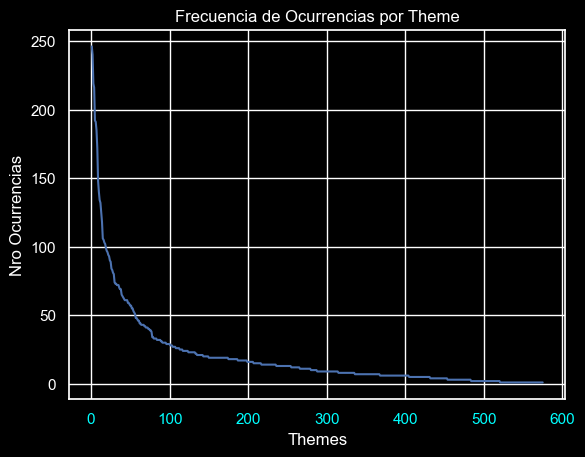

'Hay un total de 575 temáticas usadas, acumulando el 90% de ocurrencias en 301 de ellas.'

In [775]:
# Utilizamos la tabla de conteo de ocurrencias de Pandas
count = sets['theme_id'].value_counts()
count.index = range(1,count.index.size + 1)

# Creamos un gráfico
sns.lineplot(x=count.index, y=count.values)


plt.title('Frecuencia de Ocurrencias por Theme')
plt.xlabel('Themes')
plt.ylabel('Nro Ocurrencias')

plt.show()


cumsum = count.cumsum()
totsum = cumsum.iloc[-1]
acc_80 = cumsum[cumsum <= totsum *0.9].count()

display(f"Hay un total de {cumsum.size} temáticas usadas, acumulando el 90% de ocurrencias en {acc_80} de ellas.")

Observamos que hay sólo 575 temáticas únicas avistadas en el dataframe de sets, cuando anteriormente observamos que tenemos un total de 614 (hay temáticas no observadas).

También puede verse que la relación entre temáticas y sets no es muy equilibrada. Hay temáticas que aparecen en muchos sets, y hay algunas que en pocos (incluso algunas en 1 sólo set). Deberemos decidir que hacer con esto, ya que cierto porcentaje de las categorías posibles podría no acumular suficientes ocurrencias como para ser relevante.

## Limpieza y preparacón de los datos / Ingeniería de features



### 1- Datos faltantes



In [776]:
# Realicemos una contabilización y visualización de los datos faltantes en cada variable:

# Función para crear DF de análisis de faltantes:

def missing_values (df):
    df_mv_count = df.isnull().sum()
    df_mv_per = (df_mv_count / len(df)) * 100
    df_mv = pd.DataFrame({'Cantidad faltantes': df_mv_count,
                                  'Porcentaje faltante': df_mv_per})
    return df_mv


# Visualizamos:

print("\ncolors:")
display(missing_values(colors))

print("\ninventories:")
display(missing_values(inventories))

print("\ninventory_parts:")
display(missing_values(inventory_parts))

print("\ninventory_sets:")
display(missing_values(inventory_sets))

print("\npart_categoies:")
display(missing_values(part_categories))

print("\nparts:")
display(missing_values(parts))

print("\nsets:")
display(missing_values(sets))

print("\nthemes:")
display(missing_values(themes))


colors:


,Cantidad faltantes,Porcentaje faltante
id,0,0.0
name,0,0.0
rgb,0,0.0
is_trans,0,0.0



inventories:


,Cantidad faltantes,Porcentaje faltante
id,0,0.0
version,0,0.0
set_num,0,0.0



inventory_parts:


,Cantidad faltantes,Porcentaje faltante
inventory_id,0,0.0
part_num,0,0.0
color_id,0,0.0
quantity,0,0.0
is_spare,0,0.0



inventory_sets:


,Cantidad faltantes,Porcentaje faltante
inventory_id,0,0.0
set_num,0,0.0
quantity,0,0.0



part_categoies:


,Cantidad faltantes,Porcentaje faltante
id,0,0.0
name,0,0.0



parts:


,Cantidad faltantes,Porcentaje faltante
part_num,0,0.0
name,0,0.0
part_cat_id,0,0.0



sets:


,Cantidad faltantes,Porcentaje faltante
set_num,0,0.0
name,0,0.0
year,0,0.0
theme_id,0,0.0
num_parts,0,0.0



themes:


,Cantidad faltantes,Porcentaje faltante
id,0,0.000000
name,0,0.000000
parent_id,111,18.078176


Podemos observar que este dataset no cuenta con datos faltantes. La única variable con ocurrencias no computadas es el 'parent_id' de algunos 'themes'. Sin embargo, dado el contexto y el gran porcentaje de estos faltantes (18%), se entiende que en realidad el valor nulo es uno "válido".

Visualicemos un poco los valores para verificar la hipótesis:

In [777]:
# Función para contar subtemas de un tema específico
def count_subthemes(theme_id):
    subthemes = themes[themes['parent_id'] == theme_id]
    count = len(subthemes)
    for _, subtheme in subthemes.iterrows():
        count += count_subthemes(subtheme['id'])
    return count

parent_themes = themes[themes['parent_id'].isna()]

# Crear una nueva tabla para los temas 'padre' con la cantidad de subtemas
parent_themes_with_count = parent_themes.copy()
parent_themes_with_count['subtheme_count'] = parent_themes_with_count['id'].apply(count_subthemes)


parent_per =  parent_themes_with_count['subtheme_count'].sum() * 100 /themes.shape[0]
print(f"{parent_themes_with_count.shape[0]} temáticas padre agrupan {ref_count['subthemes'].sum():.0f} de {themes.shape[0]} temáticas ({parent_per:.0f}% del total).")

111 temáticas padre agrupan 398 de 614 temáticas (82% del total).


Podemos ver que estas son "themes padre". por lo cual la computación de NaN es válida, haciendo referencia a que el theme no es una sub-categoría.

Para manejar estos valores faltantes, colapsaremos el dataframe de themes para quedarnos sólo con las superclases, y luego borraremos la columna de 'parent_id'

Antes de esto deberemos re-apuntar las theme_id del dataframe de sets para que hagan referencia a las temáticas padre terminales.

Como la temática es nuestra variable de salida, esto achicará bastante las categorías de clasificación del problema.

In [778]:
# Reemplazamos los theme_id por las supertemáticas terminales

# Encontramos la supertheme terminal para cada set
def find_highest_parent(theme_id):
    parent_id = themes.loc[themes['id'] == theme_id, 'parent_id'].values[0]
    if pd.isna(parent_id):
        return theme_id
    else:
        return find_highest_parent(parent_id)

input['theme_id'] = input['theme_id'].apply(find_highest_parent)

display(input)

,year,theme_id,num_parts,Aqua,Black,Blue,Blue-Violet,Bright Green,Bright Light Blue,Bright Light Orange,...,Tiles Special,Tools,Transportation - Land,Transportation - Sea and Air,Tubes and Hoses,Wheels and Tyres,Windows and Doors,Windscreens and Fuselage,Znap,unique_parts_count
0,1970,411.0,471,0,8,30,0,0,0,0,...,0,0,0,0,0,0,16,0,0,26
1,1978,50.0,12,0,3,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
2,1979,126.0,12,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
3,1979,126.0,12,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4,1979,126.0,12,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10708,2013,408.0,15,0,4,2,0,0,0,0,...,0,0,0,0,0,1,0,0,0,13
10709,2012,408.0,15,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,14
10710,2015,598.0,59,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
10711,2010,408.0,146,0,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,24


Habiendo hecho esto, podemos volver a fabricar el gráfico de distribución de ocurrencias de temáticas que vimos en la sección anterior:

10713

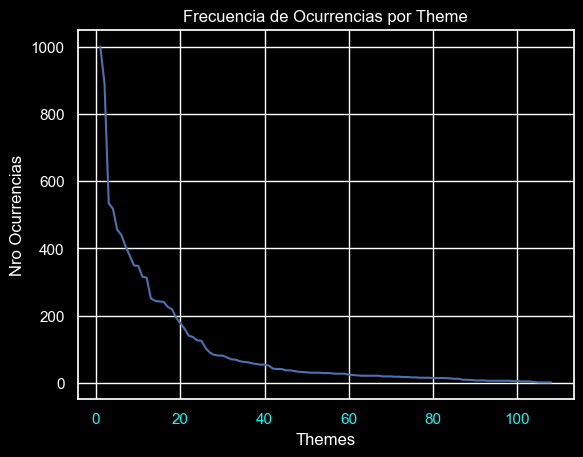

'Hay un total de 108 temáticas usadas, acumulando el 90% de ocurrencias en 43 de ellas.'

In [779]:
# Utilizamos la tabla de conteo de ocurrencias de Pandas
count = input['theme_id'].value_counts()

df_count = count.reset_index()
df_count.columns = ['id', 'count']

count.index = range(1,count.index.size + 1)

# Creamos un gráfico
sns.lineplot(x=count.index, y=count.values)


plt.title('Frecuencia de Ocurrencias por Theme')
plt.xlabel('Themes')
plt.ylabel('Nro Ocurrencias')


display(df_count['count'].sum())

plt.show()


cumsum = count.cumsum()
totsum = cumsum.iloc[-1]

display(f"Hay un total de {cumsum.size} temáticas usadas, acumulando el 90% de ocurrencias en {cumsum[cumsum <= totsum *0.9].count()} de ellas.")

Observando el gran desbalance de clases que hay (muchas temáticas casi sin usar), en caso de querer crear un clasificador, estas clases sin muchas ocurrencias podrían resultar prácticamente en ruido.

Por eso propondremos una supertemática adicional artificial, de 'sin clasificar', y pondremos al 10% de ocurrencias de temáticas poco habituales.

En otras palabras, haremos un binning de todas las clases poco habituales en una sola, para reducir el ruido.

In [780]:
count = input['theme_id'].value_counts(ascending=False)
cumsum = count.cumsum()
totsum = cumsum.iloc[-1]


mask = input['theme_id'].isin(cumsum[cumsum >= totsum * 0.90].reset_index()['theme_id'])
input.loc[mask,'theme_id'] = 5555

In [781]:
# Reemplazamos los theme_id por los theme_names (y los hacemos categóricos)
theme_names = themes[['id','name']]
input = pd.merge(input, theme_names,left_on='theme_id',right_on='id')
input.drop('theme_id',axis=1,inplace=True)
input.drop('id',axis=1,inplace=True)
input.rename(columns={'name': 'theme_name'}, inplace=True)
input['theme_name'] = input['theme_name'].astype('category')

In [782]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

y = input['theme_name']
X = input.drop(['theme_name'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


dectree = DecisionTreeClassifier(criterion='entropy',max_depth=None)
dectree.fit(X_train,y_train)
y_pred = dectree.predict(X_test)

print(classification_report(y_test, y_pred,zero_division=True))



                         precision    recall  f1-score   support

              4 Juniors       1.00      0.73      0.84        11
            Adventurers       0.88      0.64      0.74        11
           Architecture       0.72      0.76      0.74        17
               Belville       0.67      0.53      0.59        15
               Bionicle       0.90      0.90      0.90        63
            Bulk Bricks       0.82      0.77      0.79        35
                 Castle       0.67      0.79      0.72        53
                Classic       0.94      0.95      0.95        66
                Clikits       0.83      0.83      0.83         6
Collectible Minifigures       1.00      0.95      0.98        84
                Creator       0.49      0.53      0.51        80
          Designer Sets       0.33      0.60      0.43         5
             Dimensions       0.82      0.64      0.72        14
                  Duplo       0.94      0.98      0.96        48
  Educational and Dacta 